In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
Data1=pd.read_csv("USA_housing.csv")

In [3]:
Data2=Data1.copy()

In [4]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
Data2.drop("Address",axis=1,inplace=True)

In [6]:
Data2.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot:>

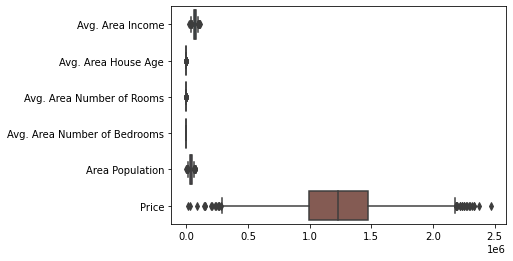

In [8]:
sns.boxplot(data=Data2[Data2.columns], orient="h")

<AxesSubplot:>

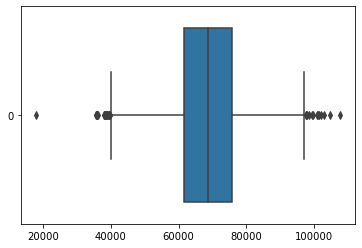

In [9]:
sns.boxplot(data=Data2["Avg. Area Income"], orient="h")

In [10]:
q1 = Data2.quantile(.25)
q3 = Data2.quantile(.75)
iqr = q3 - q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
for l,u,col in zip(lower,upper,Data2.columns):
    Data2 = Data2[(Data2[col]>l) & (Data2[col]<u)]
Data2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=Data2.iloc[:,0:5].values

In [14]:
y=Data2["Price"].values

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [16]:
X=scaler.fit_transform(x)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
regressor=LinearRegression()

In [19]:
model=regressor.fit(X_train,y_train)

In [20]:
y_pred=model.predict(X_test)

In [21]:
y_test

array([1222344.20849926,  616056.96004191, 1066279.87934336,
       1361007.56184711, 1095597.9438335 , 1053484.8692002 ,
       1426832.04892582,  914325.02915127,  992053.0502239 ,
        764955.49820708, 1553395.56206258, 1054770.98064753,
       1336377.82525371, 1176111.78829563,  772310.22782615,
       1129975.81711789, 1244440.13470232,  777718.89864854,
       1511839.35459062, 1643291.72247874, 1543357.45351051,
        702321.75232142, 1133126.48386135, 1647278.68498366,
       1159147.10911951, 1400111.49672765, 1217061.25364758,
       1443907.74738373,  959625.53017718, 1820189.53280409,
       1578136.16530262, 1130537.99274975,  738760.74743133,
       1128842.20902835, 1675557.27123079,  956435.26333485,
       1587015.35686945, 1242114.10087935,  908616.48262409,
       1074296.70364502,  781524.17637894,  890112.54931789,
        378466.42018394, 1529452.06177674,  864132.0330832 ,
        980161.6274097 , 1673294.24619638, 1413105.49480349,
        988746.42058673,

In [22]:
y_pred=pd.Series(y_pred)

In [23]:
a={"Actual":y_test,"Predicted":y_pred}

In [24]:
print("Price Prediction")
PRICES=pd.DataFrame(a)
PRICES

Price Prediction


,Actual,Predicted
0,1.222344e+06,1.128409e+06
1,6.160570e+05,7.636933e+05
2,1.066280e+06,1.101954e+06
3,1.361008e+06,1.501012e+06
4,1.095598e+06,1.212417e+06
...,...,...
482,1.247645e+06,1.218569e+06
483,1.025439e+06,9.290413e+05
484,1.296468e+06,1.381000e+06
485,1.317041e+06,1.230328e+06


In [25]:
model.predict(X_train)

array([1554577.69216278, 1098168.86243845, 1470040.33618285, ...,
       1330487.89810449, 2025992.07790796, 1834465.03291717])

In [26]:
y_train

array([1458912.58449862, 1160526.05774741, 1394518.41546763, ...,
       1273631.26707271, 2019424.22226426, 1877073.57477198])

In [27]:
from sklearn import metrics

In [28]:
metrics.r2_score(y_test,y_pred)

0.9062097698550972

In [29]:
R2=metrics.r2_score(y_test,y_pred)

In [30]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

102894.70585344634

In [31]:
metrics.mean_absolute_error(y_test,y_pred)

81882.04112532386

In [32]:
pd.DataFrame(y_pred)

,0
0,1.128409e+06
1,7.636933e+05
2,1.101954e+06
3,1.501012e+06
4,1.212417e+06
...,...
482,1.218569e+06
483,9.290413e+05
484,1.381000e+06
485,1.230328e+06


In [33]:
y_test

array([1222344.20849926,  616056.96004191, 1066279.87934336,
       1361007.56184711, 1095597.9438335 , 1053484.8692002 ,
       1426832.04892582,  914325.02915127,  992053.0502239 ,
        764955.49820708, 1553395.56206258, 1054770.98064753,
       1336377.82525371, 1176111.78829563,  772310.22782615,
       1129975.81711789, 1244440.13470232,  777718.89864854,
       1511839.35459062, 1643291.72247874, 1543357.45351051,
        702321.75232142, 1133126.48386135, 1647278.68498366,
       1159147.10911951, 1400111.49672765, 1217061.25364758,
       1443907.74738373,  959625.53017718, 1820189.53280409,
       1578136.16530262, 1130537.99274975,  738760.74743133,
       1128842.20902835, 1675557.27123079,  956435.26333485,
       1587015.35686945, 1242114.10087935,  908616.48262409,
       1074296.70364502,  781524.17637894,  890112.54931789,
        378466.42018394, 1529452.06177674,  864132.0330832 ,
        980161.6274097 , 1673294.24619638, 1413105.49480349,
        988746.42058673,

In [34]:
y_train_predict=model.predict(X_train)

In [38]:
print("Train R2")
metrics.r2_score(y_train,y_train_predict)

Train R2


0.9123984375265151

In [37]:
R2

0.9062097698550972